In [66]:
# Importing important libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential 

from glob import glob

import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Checking tensorflow version
import tensorflow as tf
print(tf.__version__)

2.4.0


In [68]:
# Re-sizing all the images for a fixed value
image_size = [224,224]

# providing paths to train and test dataset
train_path = "/content/drive/MyDrive/Malaria Prediction/Dataset/Train"
test_path = "/content/drive/MyDrive/Malaria Prediction/Dataset/Test"

In [69]:
# Importing the VGG16 library for transfer learning processes

vgg19 = VGG19(input_shape=image_size+[3], include_top=False, weights="imagenet")

In [70]:
# Checking model summary pr structure

vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [71]:
# Not training already pre_trained weights
for layer in vgg19.layers:
  layer.trainable= False

In [72]:
# Getting number of classes in training set
folders = glob("/content/drive/MyDrive/Malaria Prediction/Dataset/Train/*")
folders

['/content/drive/MyDrive/Malaria Prediction/Dataset/Train/Uninfected',
 '/content/drive/MyDrive/Malaria Prediction/Dataset/Train/Parasite']

In [73]:
# Getting number of output classes in test dataset
test_folder = glob("/content/drive/MyDrive/Malaria Prediction/Dataset/Test/*")
test_folder

['/content/drive/MyDrive/Malaria Prediction/Dataset/Test/Uninfected',
 '/content/drive/MyDrive/Malaria Prediction/Dataset/Test/Parasite']

In [74]:
# Flattneing the last layer and then adding our own layer as our final output (prediction) layer
x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [75]:
# After adding our own layer in place of input layer, creating our final model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [76]:
# Checking our final neural network (model) summary or structure
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [77]:
# telling the model what cost and optimization method to use
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
# Now time to import our images from the dataset and creating new images from it to train our model
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, validation_split=0.2, rescale=1./255, 
                                   zoom_range=0.2, shear_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [79]:
# Preparing our training and test dataset
# Making sure to provide the same target size as initialized for the image
training_set = train_datagen.flow_from_directory(train_path, 
                                                 target_size=(224,224), 
                                                 batch_size=32, 
                                                 class_mode='categorical')

Found 416 images belonging to 2 classes.


In [80]:
training_set

In [81]:
# Doing the same thing above for our test dataset
test_set = test_datagen.flow_from_directory(test_path, target_size=(224,224), 
                                                 batch_size=32, 
                                                 class_mode='categorical')

Found 134 images belonging to 2 classes.


In [82]:
# fitting the model
r = model.fit(training_set, validation_data=test_set, epochs=100, steps_per_epoch=len(training_set),
          validation_steps=len(test_set))

Epoch 1/100
13/13 [==============================] - 7s 462ms/step - loss: 1.6792 - accuracy: 0.5444 - val_loss: 0.7754 - val_accuracy: 0.6791
Epoch 2/100
13/13 [==============================] - 6s 445ms/step - loss: 0.7139 - accuracy: 0.6453 - val_loss: 1.1046 - val_accuracy: 0.4552
Epoch 3/100
13/13 [==============================] - 6s 449ms/step - loss: 0.6880 - accuracy: 0.6722 - val_loss: 0.4561 - val_accuracy: 0.7761
Epoch 4/100
13/13 [==============================] - 6s 451ms/step - loss: 0.4458 - accuracy: 0.7947 - val_loss: 0.5274 - val_accuracy: 0.7313
Epoch 5/100
13/13 [==============================] - 6s 457ms/step - loss: 0.3451 - accuracy: 0.8504 - val_loss: 0.3739 - val_accuracy: 0.8284
Epoch 6/100
13/13 [==============================] - 6s 448ms/step - loss: 0.2940 - accuracy: 0.8682 - val_loss: 0.4020 - val_accuracy: 0.8060
Epoch 7/100
13/13 [==============================] - 6s 448ms/step - loss: 0.3169 - accuracy: 0.8755 - val_loss: 0.3542 - val_accuracy: 0.8731

In [83]:
r.history

{'accuracy': [0.5697115659713745,
  0.6466346383094788,
  0.7019230723381042,
  0.8100961446762085,
  0.8413461446762085,
  0.8653846383094788,
  0.875,
  0.8846153616905212,
  0.8605769276618958,
  0.8870192170143127,
  0.8990384340286255,
  0.901442289352417,
  0.9302884340286255,
  0.9278846383094788,
  0.942307710647583,
  0.8942307829856873,
  0.9038461446762085,
  0.9254807829856873,
  0.9158653616905212,
  0.8966346383094788,
  0.9254807829856873,
  0.8918269276618958,
  0.9158653616905212,
  0.9375,
  0.9399038553237915,
  0.9447115659713745,
  0.9399038553237915,
  0.9350961446762085,
  0.9615384340286255,
  0.9495192170143127,
  0.9591346383094788,
  0.9447115659713745,
  0.942307710647583,
  0.963942289352417,
  0.963942289352417,
  0.963942289352417,
  0.9615384340286255,
  0.973557710647583,
  0.9591346383094788,
  0.9543269276618958,
  0.9495192170143127,
  0.90625,
  0.932692289352417,
  0.9399038553237915,
  0.9375,
  0.9543269276618958,
  0.9615384340286255,
  0.973557

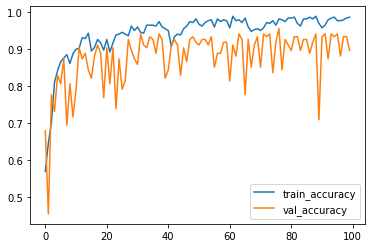

<Figure size 432x288 with 0 Axes>

In [84]:
# plotting the accuracies and losses of train and validation dataset
plt.plot(r.history['accuracy'], label = 'train_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()
plt.savefig("malaria_accuracy")


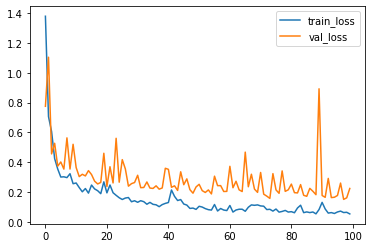

<Figure size 432x288 with 0 Axes>

In [85]:
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig("malaria_loss")

In [86]:
# Making predictions from the model in the test set
y_pred = model.predict(test_set)

In [87]:
y_pred

array([[8.04508507e-01, 1.95491463e-01],
       [7.34006763e-01, 2.65993267e-01],
       [9.99950171e-01, 4.98482623e-05],
       [9.25723135e-01, 7.42768645e-02],
       [1.51753603e-02, 9.84824598e-01],
       [1.00000000e+00, 7.88497254e-11],
       [2.17596069e-02, 9.78240371e-01],
       [9.98945773e-01, 1.05426065e-03],
       [1.97885260e-02, 9.80211496e-01],
       [2.17912570e-01, 7.82087445e-01],
       [9.99267757e-01, 7.32224493e-04],
       [5.39687984e-02, 9.46031213e-01],
       [9.96932268e-01, 3.06772022e-03],
       [9.51069057e-01, 4.89309803e-02],
       [9.99997735e-01, 2.31748186e-06],
       [9.99997973e-01, 1.98043745e-06],
       [9.99957085e-01, 4.28541607e-05],
       [3.26916277e-02, 9.67308342e-01],
       [2.52500153e-03, 9.97474968e-01],
       [9.99989867e-01, 1.00912976e-05],
       [7.45625198e-01, 2.54374802e-01],
       [2.64572412e-01, 7.35427618e-01],
       [2.25078948e-02, 9.77492154e-01],
       [1.56388693e-02, 9.84361053e-01],
       [1.000000

In [88]:
# taking the index with maximum value in y_pred because thats our prediction which we are looking for
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1])

In [89]:
# loading the model
model = load_model('malaria_vgg19_1.h5')

# loading a random image for testing
img = load_img('/content/drive/MyDrive/Malaria Prediction/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_97.png',
                 target_size = (224,224))

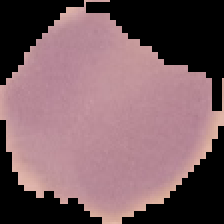

In [90]:
img

In [91]:
# converting image to array so that the model can understand
vect_image = image.img_to_array(img)

In [92]:
vect_image

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [93]:
vect_image.shape

(224, 224, 3)

In [94]:
# rescaling our image/vect_image as we have done the same in our model
vect_image = vect_image/255

In [95]:
# Expanding the dimensions
vect_image= np.expand_dims(vect_image, axis=0)
img_data = preprocess_input(vect_image)
img_data.shape

(1, 224, 224, 3)

In [96]:
# making predictions on processed image
pred = model.predict(img_data)

In [97]:
pred

array([[0.01281476, 0.9871853 ]], dtype=float32)

In [98]:
# Taking the index of maximum value as our answer
final_pred = np.argmax(pred, axis=1)
final_pred

array([1])

In [99]:
if (final_pred==1):
  print('uninfected')
else:
  print('parasite(infected)')

uninfected
